### Replication : Long Call up and in ATM

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [14]:
configuration = ConfigurationBuilder(
    kind='call',
    spot=100,
    strike=100,
    sigma=0.30,
    maturity=252,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [15]:
shift = 1
barrier = 120

quantity = (barrier - configuration.spot) / shift

configuration.strike = 100
call_1 = BlackScholesMerton(configuration)

configuration.strike = barrier
call_2 = BlackScholesMerton(configuration)

configuration.strike = barrier + shift
call_3 = BlackScholesMerton(configuration)

In [11]:
cuo = call_1 - call_2 - (call_2 * quantity) + (call_3 * quantity)

In [12]:
print('price', abs(cuo.price()))
print('delta', cuo.delta())
print('gamma', cuo.gamma())
print('vega', cuo.vega())
print('theta', cuo.theta())
print('rho', cuo.rho())

price 2.079250289842392
delta 0.03856227809271662
gamma -0.0019301913356988554
vega -0.05790574007096616
theta 0.00344677024231943
rho 0.01776977519429135


#### With Geometric Brownian Motion

In [16]:
configuration.simulation = 10000
configuration.steps = 252
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [17]:
gbm_pricing.price()

1.9454101062824891

### Sensitivity : Long cui

In [16]:
data = []

for maturity, sigma in ((252, 0.2), (252, 0.05), (126, 0.20)):
    for spot in range(10, 190):
        
        # Configuration ---------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option  -----------------------------------

        configuration.strike = 100
        call_1 = BlackScholesMerton(configuration)

        configuration.strike = barrier
        call_2 = BlackScholesMerton(configuration)

        configuration.strike = barrier + shift
        call_3 = BlackScholesMerton(configuration)
        
        cuo = call_1 - call_2 - (call_2 * quantity) + (call_3 * quantity)

        # Retrieve Result ---------------------------

        data.append({"spot": spot,
                     "maturity": maturity,
                     "sigma": sigma,
                     "price": abs(cuo.price()),
                     "delta": cuo.delta(),
                     "gamma": cuo.gamma(),
                     "vega": cuo.vega(),
                     "theta": cuo.theta(),
                     "rho": cuo.rho()})

# Reshape data ----------------------------------------

data = pd.DataFrame(data)
reference = data[(data["maturity"]==252) & (data["sigma"]==0.2)].set_index("spot")
short_sigma = data[(data["maturity"]==252) & (data["sigma"]==0.05)].set_index("spot")
short_maturity = data[(data["maturity"]==126) & (data["sigma"]==0.20)].set_index("spot")

In [17]:
price = pd.DataFrame()
price["sigma  20 maturity  252"] = reference["price"]
price["sigma  5 maturity  252"] = short_sigma["price"]
price["sigma  20 maturity  126"] = short_maturity["price"]

delta = pd.DataFrame()
delta["sigma  20 maturity  252"] = reference["delta"]
delta["sigma  5 maturity  252"] = short_sigma["delta"]
delta["sigma  20 maturity  126"] = short_maturity["delta"]

gamma = pd.DataFrame()
gamma["sigma  20 maturity  252"] = reference["gamma"]
gamma["sigma  5 maturity  252"] = short_sigma["gamma"]
gamma["sigma  20 maturity  126"] = short_maturity["gamma"]

vega = pd.DataFrame()
vega["sigma  20 maturity  252"] = reference["vega"]
vega["sigma  5 maturity  252"] = short_sigma["vega"]
vega["sigma  20 maturity  126"] = short_maturity["vega"]

theta = pd.DataFrame()
theta["sigma  20 maturity  252"] = reference["theta"]
theta["sigma  5 maturity  252"] = short_sigma["theta"]
theta["sigma  20 maturity  126"] = short_maturity["theta"]

rho = pd.DataFrame()
rho["sigma  20 maturity  252"] = reference["rho"]
rho["sigma  5 maturity  252"] = short_sigma["rho"]
rho["sigma  20 maturity  126"] = short_maturity["rho"]

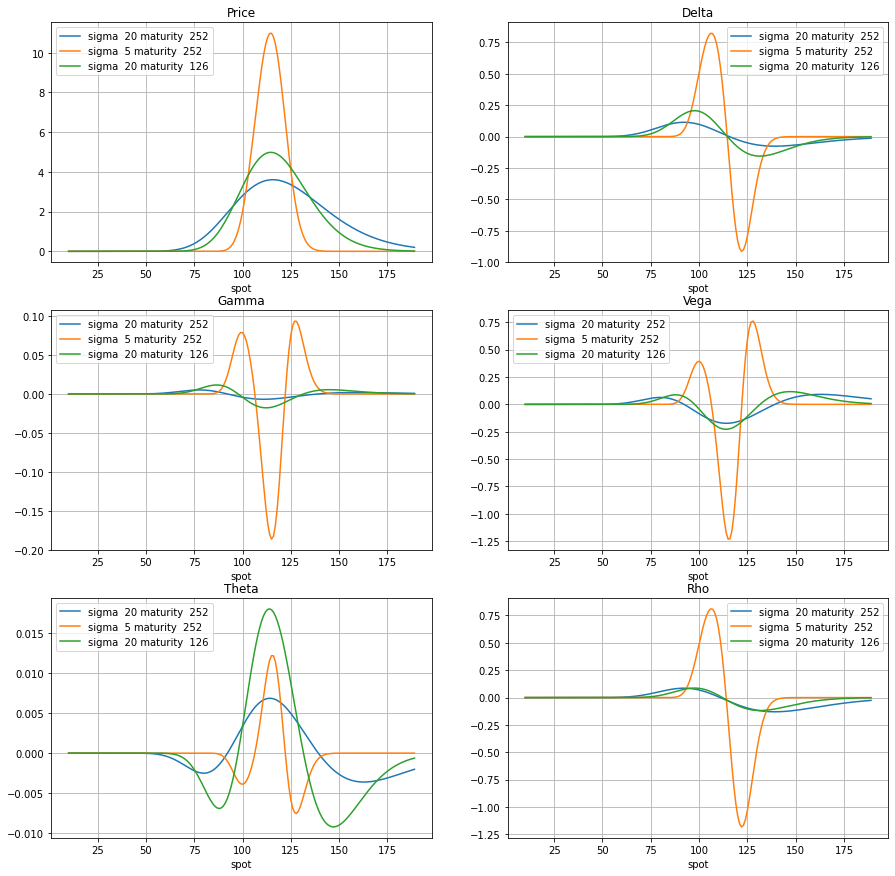

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2)

price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)

delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)

gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)

vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)

theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)

rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)

fig.set_figheight(15)
fig.set_figwidth(15);